In [1]:
!nvidia-smi

Tue Mar  1 09:18:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
!wget https://github.com/MuhammadHananAsghar/Black_Friday_EDA_and_FE_and_MT/blob/main/train_cleaned.csv

--2022-03-01 09:31:32--  https://github.com/MuhammadHananAsghar/Black_Friday_EDA_and_FE_and_MT/blob/main/train_cleaned.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train_cleaned.csv’

train_cleaned.csv       [ <=>                ] 176.91K  --.-KB/s    in 0.1s    

2022-03-01 09:31:33 (1.70 MB/s) - ‘train_cleaned.csv’ saved [181160]



In [13]:
!wget https://github.com/MuhammadHananAsghar/Black_Friday_EDA_and_FE_and_MT/blob/main/test_cleaned.csv

--2022-03-01 09:31:34--  https://github.com/MuhammadHananAsghar/Black_Friday_EDA_and_FE_and_MT/blob/main/test_cleaned.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘test_cleaned.csv’

test_cleaned.csv        [ <=>                ] 176.80K  --.-KB/s    in 0.1s    

2022-03-01 09:31:34 (1.73 MB/s) - ‘test_cleaned.csv’ saved [181045]



**Loading and Scaling**

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [39]:
df_train = pd.read_csv("train_cleaned.csv")

In [40]:
df_train.shape

(550068, 11)

In [41]:
df_train.head()

,Unnamed: 0,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,1,10,1,2,0,3,8,16,8370.0
1,1,1,1,10,1,2,0,1,6,14,15200.0
2,2,1,1,10,1,2,0,12,8,16,1422.0
3,3,1,1,10,1,2,0,12,14,16,1057.0
4,4,1,7,16,3,4,0,8,8,16,7969.0


In [42]:
X = df_train.iloc[:, :-1]
Y = df_train.iloc[:,-1]
X, Y = shuffle(X, Y)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [44]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [45]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

#Model

In [17]:
y_test.shape

(165021, 1)

In [18]:
import tensorflow as tf

In [21]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=256, activation="relu", input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2816      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 44,033
Trainable params: 44,033
Non-trai

In [23]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [24]:
model.fit(x=X_train, y=y_train, 
	validation_data=(X_test, y_test),
	epochs=200, batch_size=256)

Epoch 1/200
1505/1505 [==============================] - 9s 5ms/step - loss: 0.6392 - mae: 0.5900 - val_loss: 0.5180 - val_mae: 0.5357
Epoch 2/200
1505/1505 [==============================] - 9s 6ms/step - loss: 0.4743 - mae: 0.5109 - val_loss: 0.3807 - val_mae: 0.4709
Epoch 3/200
1505/1505 [==============================] - 9s 6ms/step - loss: 0.3889 - mae: 0.4734 - val_loss: 0.3805 - val_mae: 0.4608
Epoch 4/200
1505/1505 [==============================] - 8s 5ms/step - loss: 0.3766 - mae: 0.4658 - val_loss: 0.3712 - val_mae: 0.4618
Epoch 5/200
1505/1505 [==============================] - 9s 6ms/step - loss: 0.3719 - mae: 0.4629 - val_loss: 0.3631 - val_mae: 0.4609
Epoch 6/200
1505/1505 [==============================] - 8s 5ms/step - loss: 0.3693 - mae: 0.4607 - val_loss: 0.3672 - val_mae: 0.4596
Epoch 7/200
1505/1505 [==============================] - 8s 5ms/step - loss: 0.3672 - mae: 0.4592 - val_loss: 0.3680 - val_mae: 0.4592
Epoch 8/200
1505/1505 [==============================] 

In [25]:
model.evaluate(X_test, y_test)

5157/5157 [==============================] - 15s 3ms/step - loss: 0.3431 - mae: 0.4397


[0.34312930703163147, 0.43971335887908936]

In [26]:
pred = model.predict(X_test)

In [27]:
y_predict = scaler_y.inverse_transform(pred)
y_test = scaler_y.inverse_transform(y_test)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [29]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nR2 =', round(r2,4)) 

RMSE = 2942.62 
MSE = 8659012.42587006 
R2 = 0.6567


In [30]:
predict_df = pd.DataFrame(y_predict)
test_df = pd.DataFrame(y_test)

compared = pd.concat([test_df, predict_df], axis = 1)
compared.sample(7)

,0,0
50328,5309.0,6163.640137
10626,5941.0,5198.945801
122597,13.0,65.145035
10964,12007.0,12904.424805
70646,4253.0,13073.716797
118562,12633.0,16633.984375
125903,7140.0,6124.952148


In [31]:
compared.columns = ['test','predict']

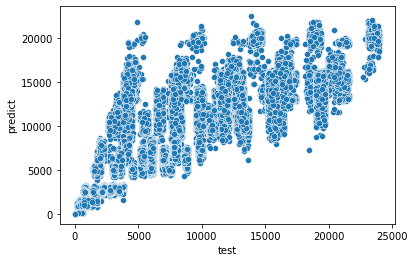

In [32]:
import seaborn as sns

sns.scatterplot(data= compared, x="test", y="predict")

By Muhammad Hanan Asghar